# **Task1**

In [2]:
# TREE Example: BFS and DFS using numbers

tree = {
    1: [2, 3],
    2: [4, 5],
    3: [6, 7],
    4: [],
    5: [],
    6: [],
    7: []
}

# Breadth First Search (BFS)
def bfs_tree(start):
    visited = []
    queue = [start]

    while queue:
        node = queue.pop(0)
        if node not in visited:
            visited.append(node)
            queue.extend(tree[node])
    return visited

# Depth First Search (DFS)
def dfs_tree(start, visited=None):
    if visited is None:
        visited = []
    visited.append(start)
    for neighbor in tree[start]:
        if neighbor not in visited:
            dfs_tree(neighbor, visited)
    return visited

print("BFS (Tree):", bfs_tree(1))
print("DFS (Tree):", dfs_tree(1))



BFS (Tree): [1, 2, 3, 4, 5, 6, 7]
DFS (Tree): [1, 2, 4, 5, 3, 6, 7]


In [16]:
# GRAPH Example: BFS and DFS using numbers

graph = {
    1: [2, 3],
    2: [1, 3, 4],
    3: [1, 2, 5],
    4: [2, 5],
    5: [3, 4]
}

# Breadth First Search (BFS)
def bfs_graph(start):
    visited = []
    queue = [start]

    while queue:
        node = queue.pop(0)
        if node not in visited:
            visited.append(node)
            queue.extend(graph[node])
    return visited

# Depth First Search (DFS)
def dfs_graph(start, visited=None):
    if visited is None:
        visited = []
    visited.append(start)
    for neighbor in graph[start]:
        if neighbor not in visited:
            dfs_graph(neighbor, visited)
    return visited

print("BFS (Graph):", bfs_graph(1))
print("DFS (Graph):", dfs_graph(1))


BFS (Graph): [1, 2, 3, 4, 5]
DFS (Graph): [1, 2, 3, 5, 4]


# **Task2**

In [3]:
# Task #2: Dictionary Operations
# Creating a dictionary to store student information

student = {
    "name": "Tahir Ahmad",
    "age": 20,
    "roll_number": "SP23-BSE-098",
    "grade": "A"
}

print("Original Dictionary:")
print(student)


Original Dictionary:
{'name': 'Tahir Ahmad', 'age': 20, 'roll_number': 'SP23-BSE-098', 'grade': 'A'}


In [4]:
# 1. Print all keys and values

print("\nAll Keys:")
print(student.keys())

print("\nAll Values:")
print(student.values())



All Keys:
dict_keys(['name', 'age', 'roll_number', 'grade'])

All Values:
dict_values(['Tahir Ahmad', 20, 'SP23-BSE-098', 'A'])


In [5]:
# 2. Update the grade of the student
student["grade"] = "A"
print("\nUpdated Grade:")
print(student)



Updated Grade:
{'name': 'Tahir Ahmad', 'age': 20, 'roll_number': 'SP23-BSE-098', 'grade': 'A'}


In [6]:
# 3. Add a new key 'email' with a value
student["email"] = "Tahirahmad1002@gmail.com"
print("\nAdded Email:")
print(student)



Added Email:
{'name': 'Tahir Ahmad', 'age': 20, 'roll_number': 'SP23-BSE-098', 'grade': 'A', 'email': 'Tahirahmad1002@gmail.com'}


In [7]:
# 4. Delete the 'roll_number' key
del student["roll_number"]
print("\nAfter Deleting roll_number:")
print(student)



After Deleting roll_number:
{'name': 'Tahir Ahmad', 'age': 20, 'grade': 'A', 'email': 'Tahirahmad1002@gmail.com'}


# **Task3**

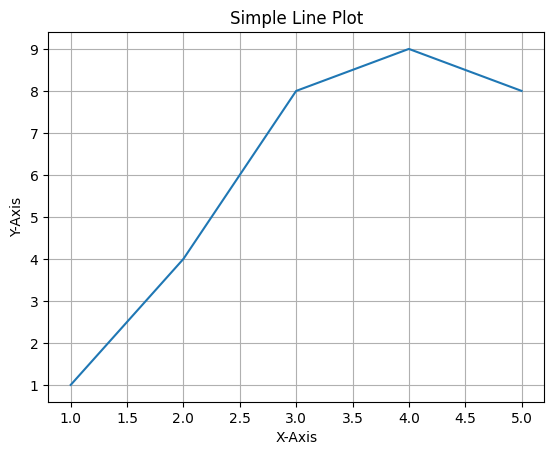

In [9]:
# Task #3: Simple Line Plot using Matplotlib

import matplotlib.pyplot as plt

# Data for the plot
X = [1, 2, 3, 4, 5]
Y = [1, 4, 8, 9, 8]

# Create a simple line plot
plt.plot(X, Y)

# Add title and axis labels
plt.title("Simple Line Plot")
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")

# Add grid lines
plt.grid(True)

# Display the plot
plt.show()


## **Task4**

In [10]:
import time
import sys
from collections import deque


In [11]:
# BFS for Water Jug Problem

def bfs_water_jug(maxA, maxB, target):
    visited = set()
    queue = deque()
    queue.append((0, 0))  # start with both jugs empty
    parent = {}

    while queue:
        state = queue.popleft()
        x, y = state

        # Goal reached
        if x == target or y == target:
            path = []
            while state:
                path.append(state)
                state = parent.get(state)
            path.reverse()
            return path

        if state in visited:
            continue

        visited.add(state)

        # Possible next states (6 standard actions)
        next_states = [
            (maxA, y),        # fill A
            (x, maxB),        # fill B
            (0, y),           # empty A
            (x, 0),           # empty B
            (x - min(x, maxB - y), y + min(x, maxB - y)),  # pour A -> B
            (x + min(y, maxA - x), y - min(y, maxA - x))   # pour B -> A
        ]

        for next_state in next_states:
            if next_state not in visited:
                parent[next_state] = state
                queue.append(next_state)

    return None


In [12]:
# DFS for Water Jug Problem

def dfs_water_jug(maxA, maxB, target):
    visited = set()
    stack = [(0, 0)]
    parent = {}

    while stack:
        state = stack.pop()
        x, y = state

        # Goal reached
        if x == target or y == target:
            path = []
            while state:
                path.append(state)
                state = parent.get(state)
            path.reverse()
            return path

        if state in visited:
            continue

        visited.add(state)

        next_states = [
            (maxA, y),
            (x, maxB),
            (0, y),
            (x, 0),
            (x - min(x, maxB - y), y + min(x, maxB - y)),
            (x + min(y, maxA - x), y - min(y, maxA - x))
        ]

        for next_state in next_states:
            if next_state not in visited:
                parent[next_state] = state
                stack.append(next_state)

    return None


In [14]:
import tracemalloc  # to measure memory usage

maxA, maxB, target = 7, 5, 6


# --- BFS ---
start_time = time.time()
tracemalloc.start()
bfs_path = bfs_water_jug(maxA, maxB, target)
current, peak_bfs = tracemalloc.get_traced_memory()
tracemalloc.stop()
bfs_time = time.time() - start_time

# --- DFS ---
start_time = time.time()
tracemalloc.start()
dfs_path = dfs_water_jug(maxA, maxB, target)
current, peak_dfs = tracemalloc.get_traced_memory()
tracemalloc.stop()
dfs_time = time.time() - start_time

# --- Comparison Results ---
print("=== BFS Results ===")
print("Path:", bfs_path)
print("Steps:", len(bfs_path))
print(f"Time Taken: {bfs_time:.6f} sec")
print(f"Memory Used: {peak_bfs / 1024:.2f} KB")

print("\n=== DFS Results ===")
print("Path:", dfs_path)
print("Steps:", len(dfs_path))
print(f"Time Taken: {dfs_time:.6f} sec")
print(f"Memory Used: {peak_dfs / 1024:.2f} KB")


=== BFS Results ===
Path: [(0, 0), (7, 0), (2, 5), (2, 0), (0, 2), (7, 2), (4, 5), (4, 0), (0, 4), (7, 4), (6, 5)]
Steps: 11
Time Taken: 0.001621 sec
Memory Used: 19.16 KB

=== DFS Results ===
Path: [(0, 0), (0, 5), (5, 0), (5, 5), (7, 3), (7, 0), (2, 5), (2, 0), (0, 2), (7, 2), (4, 5), (4, 0), (0, 4), (7, 4), (6, 5)]
Steps: 15
Time Taken: 0.001279 sec
Memory Used: 19.16 KB


# **Task5**

In [15]:
# A* on the provided 6x6 maze (4-neighbour moves)
import heapq

walls = {(1,0),(1,1),(3,1),(4,1),(5,1),(2,3),(3,2),(4,4),(0,5),(1,5),(3,5)}
letters = {
    (0,0):'A', (1,0):None, (2,0):'B', (3,0):'C', (4,0):'D', (5,0):'E',
    (0,1):'F', (1,1):None, (2,1):'G', (3,1):None, (4,1):None, (5,1):None,
    (0,2):'H', (1,2):'I', (2,2):'J', (3,2):None, (4,2):'K', (5,2):'L',
    (0,3):'M', (1,3):'N', (2,3):None, (3,3):'O', (4,3):'P', (5,3):'Q',
    (0,4):'R', (1,4):'S', (2,4):'T', (3,4):'U', (4,4):None, (5,4):'V',
    (0,5):None,(1,5):None,(2,5):'W',(3,5):None,(4,5):'X',(5,5):'Y'
}
start = (0,0)
goal = (5,5)
width, height = 6,6

def heuristic(a,b):
    return abs(a[0]-b[0]) + abs(a[1]-b[1])

def neighbors(node):
    x,y = node
    for dx,dy in [(1,0),(-1,0),(0,1),(0,-1)]:
        nx,ny = x+dx, y+dy
        if 0 <= nx < width and 0 <= ny < height and (nx,ny) not in walls:
            yield (nx,ny)

def a_star(start, goal):
    open_set = []
    heapq.heappush(open_set, (heuristic(start,goal), 0, start))
    came_from = {}
    g_score = {start: 0}
    closed = set()
    while open_set:
        f, g, current = heapq.heappop(open_set)
        if current == goal:
            path = []
            node = current
            while node in came_from:
                path.append(node)
                node = came_from[node]
            path.append(start)
            path.reverse()
            return path
        if current in closed:
            continue
        closed.add(current)
        for nb in neighbors(current):
            tentative_g = g_score[current] + 1
            if tentative_g < g_score.get(nb, 1e9):
                came_from[nb] = current
                g_score[nb] = tentative_g
                heapq.heappush(open_set, (tentative_g + heuristic(nb, goal), tentative_g, nb))
    return None

path = a_star(start, goal)
path_letters = [letters.get(p, '?') if letters.get(p, None) is not None else f"({p[0]},{p[1]})" for p in path] if path else None

print("Path (coords):", path)
print("Path (letters):", " -> ".join(path_letters))


Path (coords): [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (2, 4), (3, 4), (3, 3), (4, 3), (5, 3), (5, 4), (5, 5)]
Path (letters): A -> F -> H -> M -> R -> S -> T -> U -> O -> P -> Q -> V -> Y
